In [74]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

In [75]:
data_filename = 'data/13_102.5_104.5_0.1.npy'
amplitude = np.load(data_filename)
summed_z = np.average(np.abs(amplitude), 2)

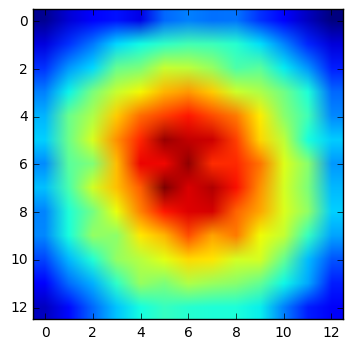

In [76]:
plt.imshow(summed_z)

Here we generate a fit to this:

In [77]:
f1 = lambda x: 0.75*(np.cos(x)+.333*np.cos(3*x))

In [78]:
x = np.linspace(-np.pi/2., np.pi/2., 13)
y = np.copy(x)
fake_amplitude = np.dot(f1(x[:, None]), f1(x[None, :]))

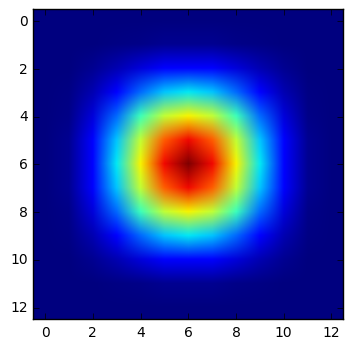

In [79]:
plt.imshow(fake_amplitude)

In [80]:
minimize?

In [81]:
minimize(lambda a: np.sum(np.square(a*fake_amplitude-summed_z)), [1])

      fun: 768.636023645492
 hess_inv: array([[ 0.03556977]])
      jac: array([  7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 4
     njev: 5
   status: 0
  success: True
        x: array([ 7.80711975])

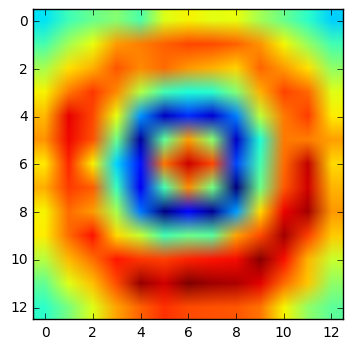

In [83]:
plt.imshow(np.abs(7.80711975*fake_amplitude-summed_z))